In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


# 1. Load Data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df = df.dropna()

# 2. Data Visualiztion

#### - Analyze continues variables against Churn variable

In [6]:
df_ = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df_ = df.dropna()

In [7]:
#Convert to Categorical variable
df_.SeniorCitizen= df.SeniorCitizen.apply(lambda x : 'No' if x == 0 else 'Yes')
df_.SeniorCitizen.unique()

array(['No', 'Yes'], dtype=object)

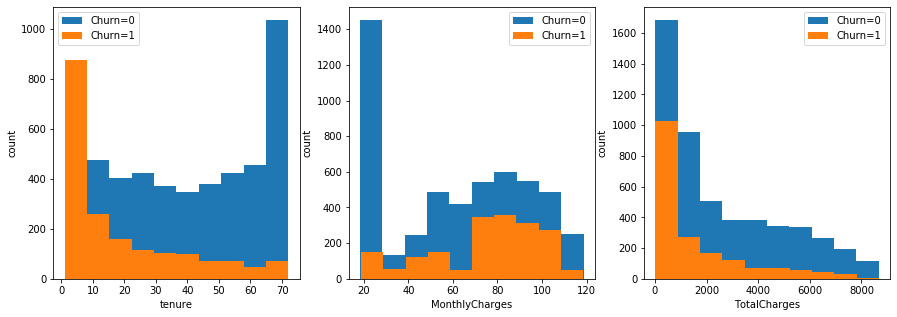

In [8]:
continues=[i for i in df_.columns if df_[i].dtypes !='object']
fig , ax = plt.subplots(1,3,figsize=(15,5))
for i , x in enumerate(continues):
    ax[i].hist(df[x][df_.Churn=='No'],label='Churn=0')
    ax[i].hist(df[x][df_.Churn=='Yes'],label='Churn=1')
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

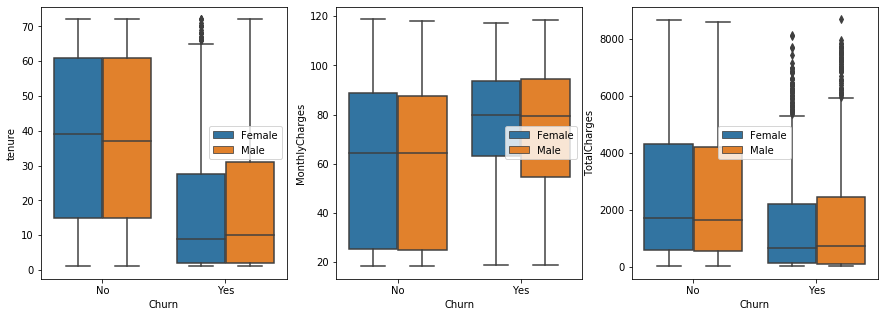

In [9]:
fig , ax = plt.subplots(1,3,figsize=(15,5))
for i , xi in enumerate(continues):
    sns.boxplot(x=df_.Churn,y=df_[xi],ax=ax[i],hue=df_.gender)
    ax[i].set(xlabel='Churn',ylabel=xi)
    ax[i].legend()

#### - Analyze categorical variables against Churn variable

In [10]:
df_.dtypes=='object'
categorical=[i for i in df.columns if df_[i].dtypes=='object']
for z in categorical:
    print(df_[z].name,':',df_[z].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [11]:
Dual_features= ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in Dual_features:
    df_[i]=df_[i].apply(lambda x: 'No' if x=='No internet service' else x)
#Remove No Phones Service that equivilent to No for MultipleLines
df_.MultipleLines=df_.MultipleLines.apply(lambda x: 'No' if x=='No phone service' else x)

In [12]:
for z in [i for i in df.columns if df[i].dtypes=='object']:
    print(df[z].name,':',df[z].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
#Remove Churn Variable for Analysis
categorical_var_NoChurn= categorical[1:-1]
categorical_var_NoChurn

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

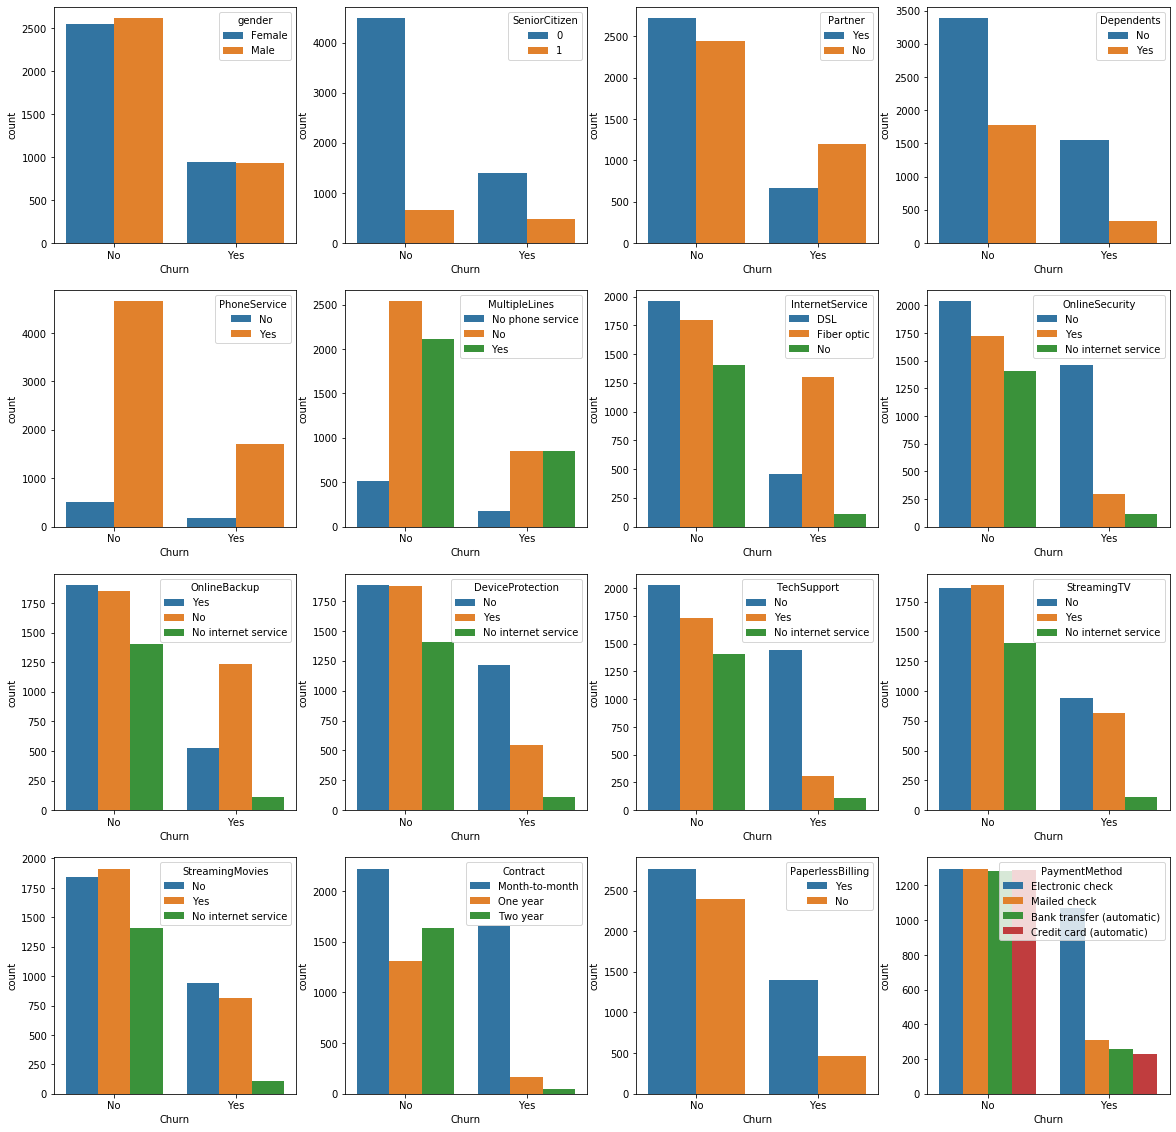

In [15]:
#Count Plot all Categorical Variables with Hue Churn
fig , ax = plt.subplots(4,4,figsize=(20,20))
for axi , var in zip(ax.flat,categorical_var_NoChurn):
    sns.countplot(x=df.Churn,hue=df[var],ax=axi)

We cannot see a real Impact of gender
<br>Seniors are less loyalty
<br>Partners are highly loyal
<br>Dependents are middle loyal
<br>customers with PhoneService are middle loyal
<br>Customers without multiplelines are more loyal
<br>Customer with InternetService of FiberOptic are easily to churn
<br>.....
<br>Customers with month-to-month contract are more willing to leave than people with contracts
<br>Paperless customers are more willing to leave that paper billing
<br>Customer pay using electronic check is more willing to leave
<br>I can conclude that mostly customers are suffering from the services , and specially advances customers who are using paperless billing and electronic payment. Some variables has no real impact of Churn.

# 3. Data Preparation

#### - Encoding target var: Churn

In [16]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
df['Churn'].mean()

0.26578498293515357

#### - Continuous Vars

In [18]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [19]:
scaler = StandardScaler()
scaler.fit(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.214741e-16,9.652878e-17,-1.172113e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,9.199259e-01,8.331482e-01,6.668271e-01
max,1.612573e+00,1.793381e+00,2.824261e+00


In [20]:
continuous = list(df.describe().columns)
continuous

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

#### - One-Hot Encoding

In [21]:
for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


In [22]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col],drop_first=True)
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [23]:
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderMale,SeniorCitizen1,PartnerYes,DependentsYes,PhoneServiceYes,MultipleLinesNo phone service,...,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo internet service,StreamingMoviesYes,ContractOne year,ContractTwo year,PaperlessBillingYes,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280248,-1.161694,-0.994194,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0.064303,-0.260878,-0.173740,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0.512486,-0.747850,-0.195248,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5,-0.995040,1.158489,-0.645369,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
6,-0.424625,0.807802,-0.147313,0,1,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
7,-0.913552,-1.165018,-0.874169,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,-0.180161,1.329677,0.336516,1,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
9,1.205134,-0.287470,0.531476,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
sample_set.shape

(7032, 31)

In [25]:
list(sample_set.columns)

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'genderMale',
 'SeniorCitizen1',
 'PartnerYes',
 'DependentsYes',
 'PhoneServiceYes',
 'MultipleLinesNo phone service',
 'MultipleLinesYes',
 'InternetServiceFiber optic',
 'InternetServiceNo',
 'OnlineSecurityNo internet service',
 'OnlineSecurityYes',
 'OnlineBackupNo internet service',
 'OnlineBackupYes',
 'DeviceProtectionNo internet service',
 'DeviceProtectionYes',
 'TechSupportNo internet service',
 'TechSupportYes',
 'StreamingTVNo internet service',
 'StreamingTVYes',
 'StreamingMoviesNo internet service',
 'StreamingMoviesYes',
 'ContractOne year',
 'ContractTwo year',
 'PaperlessBillingYes',
 'PaymentMethodCredit card (automatic)',
 'PaymentMethodElectronic check',
 'PaymentMethodMailed check']

# 4. Train & Test Sets

In [26]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

# 5. Build model

#### - Training a Neural Network Model

In [27]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features], 
    sample_set[target_var], 
    test_size=0.3
)

In [30]:
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
4922/4922 [==============================] - 0s 38us/step - loss: 0.6211 - accuracy: 0.6924
Epoch 2/50
4922/4922 [==============================] - 0s 10us/step - loss: 0.4802 - accuracy: 0.7694
Epoch 3/50
4922/4922 [==============================] - 0s 8us/step - loss: 0.4419 - accuracy: 0.7867
Epoch 4/50
4922/4922 [==============================] - 0s 9us/step - loss: 0.4349 - accuracy: 0.7907
Epoch 5/50
4922/4922 [==============================] - 0s 9us/step - loss: 0.4306 - accuracy: 0.7938
Epoch 6/50
4922/4922 [==============================] - 0s 8us/step - loss: 0.4276 - accuracy: 0.7974
Epoch 7/50
4922/4922 [==============================] - 0s 8us/step - loss: 0.4245 - accuracy: 0.7985
Epoch 8/50
4922/4922 [==============================] - 0s 8us/step - loss: 0.4223 - accuracy: 0.8027
Epoch 9/50
4922/4922 [==============================] - 0s 8us/step - loss: 0.4203 - accuracy: 0.8035
Epoch 10/50
4922/4922 [==============================] - 0s 8us/step - loss: 0.4

#### - Accuracy, Precision, Recall

In [31]:
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

In [32]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8147
Out-of-Sample Accuracy: 0.7934


In-Sample Precision: 0.6927
Out-of-Sample Precision: 0.6109


In-Sample Recall: 0.5657
Out-of-Sample Recall: 0.5223


#### - ROC & AUC

In [33]:
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]

In [34]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [35]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8668
Out-Sample AUC: 0.8341


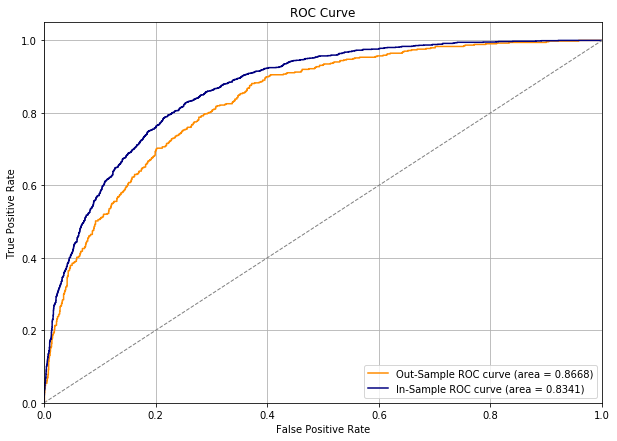

In [36]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()